## Hồi quy tuyến tính

## Nội dung
1. Mô hình toán học của hồi quy tuyến tính.
2. Xây dựng mô hình hồi quy tuyến tính với TF.
-----

## 1. Mô hình toán học của hồi quy tuyến tính

Linear Regression là thuật toán đơn giản nhất trong các thuật toán cơ bản của Machine Learning. Nó cơ bản vì chúng ta đã bắt gặp nó rất nhiều ở phổ thông. Thường thì khi nghe đến nó thì có vẽ rất lạ nhưng thật sự bạn đã gặp nó nhưng chưa ai nói cho bạn tên của nó là Hồi Quy tuyến tính.

Đây là thuật toán thuộc lớp thuật toán Supervised Learning, từ tập dữ liệu ban đầu đã được gán nhãn hãy đi xây dựng một mô hình sau cho với mỗi input đầu vào bất kì thì mô hình cho ra giá trị output gần với giá trị ngoài thực tế nhất.

### Các vấn đề

**Bài toán dân số** là bài toán khá là nóng, mục tiêu của bài toán khi thu thập được thông tin về dân số của từng năm từ thời điểm trở về trước ta mong muốn ước lượng chính xác nhất có thể dân số của thế giới trong các năm tiếp theo ?

**Bài toán giá nhà ở** cũng rất thực tế, một căn nhà có các đặt điểm như số tầng, diện tích căn nhà, khoảng cách đến thành phố,... Đương nhiên càng nhiều tầng, càng diện tích lớn, càng gần thành phố thì giá nhà càng lớn. Vì vậy nhiệm vụ của chúng ta là tìm ra mối quan hệ giữa Giá tiền và các đặc trưng Số tầng, Diện tích, Khoảng cách,... Mối quan hệ đó chính là mô hình của thuật toán Linear Regression.

### Mô hình toán học

## 2. Xây dựng mô hình hồi quy tuyến tính với TF

Chúng ta sẽ đưa mô hình toán học ở trên thành các dòng code ! Cool. Chúng ta dùng thư viện tensorflow dựa theo flow làm việc truyền thống của Machine Learning.

#### Import thư viện cần thiết

In [1]:
from __future__ import print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd

C:\Users\PC\Anaconda3\envs\OpenCV_env\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\PC\Anaconda3\envs\OpenCV_env\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\PC\Anaconda3\envs\OpenCV_env\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\PC\Anaconda3\envs\OpenCV_env\lib\site

Giải thích:
- Dòng 1: import thư viện tensorflow và đặt tên sử dụng là `tf`,
- Dòng 2: import thư viện numpy và đặt tên cho nó là `np`, dùng để lưu trữ dataset.
- Dòng 3: import package `pyplot` và đặt tên cho nó là `plt`, dùng để trực quan hóa dữ liệu.
- Dòng 4: import package `random` và đặt tên cho nó là `rd`, dùng để sinh dữ liệu nhiễu ngẫu nhiên trong ví dụ này.

#### Chuẩn bị dataset

In [2]:
train_X = np.asarray([3.3, 4.4, 5.5, 6.71, 6.93, 4.168, 9.779, 6.182, 7.59, 2.167,
                         7.042, 10.791, 5.313, 7.997, 5.654, 9.27, 3.1])
train_Y = np.asarray([1.7, 2.76, 2.09, 3.19, 1.694, 1.573, 3.366, 2.596, 2.53, 1.221,
                         2.827, 3.465, 1.65, 2.904, 2.42, 2.94, 1.3])
n_samples = train_X.shape[0]

Tiếp theo ta đi trực quan hóa dữ liệu trước khi đi xây dựng mô hình.

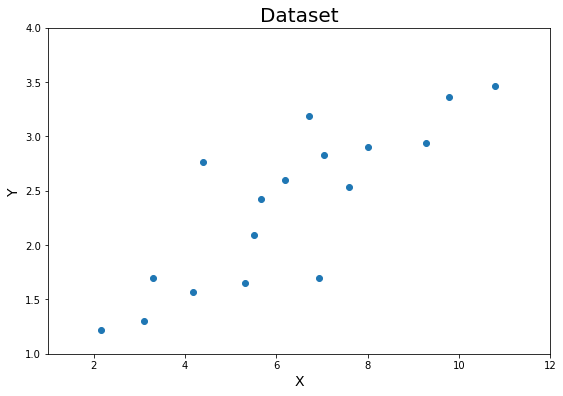

In [3]:
fig, ax = plt.subplots(figsize=(9,6))

ax.scatter(train_X, train_Y)
ax.set_title('Dataset', fontsize=20)
plt.xlabel('X', fontsize=14)
plt.ylabel('Y', fontsize=14)

plt.xlim(1, 12)
plt.ylim(1, 4)

plt.show()

Cool ! Dường như chúng có hình dáng của một đường thẳng, chúng ta bắt đầu đi xây dựng mô hình, trước hết là thiết lập các tham số cho việc huấn luyện.

#### Thiết lập các tham số huấn luyện

In [4]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

Giải thích:
- Dòng 1: chúng ta đặt learning_rate $\eta$ có giá trị là 0.01, tốc độ học của mô hình thường xuất hiện trong Gradient Descent.
- Dòng 2: training_epochs là số lần duyệt qua toàn bộ dữ liệu, tức là với bộ dữ liệu đã được tạo ở trên chúng ta sẽ dùng nó để huấn luyện cho mô hình, và quá trình huấn luyện ta phải duyệt qua toàn bộ dữ liệu nhiều lần, một lần duyệt qua toàn bộ dữ liệu chúng ta gọi là một epoch. Còn nữa, trong mỗi lần duyệt tập dữ liệu, ta lại chọn ra k điểm dữ liệu để huấn luyện. That's so awsome !

#### Xây dựng mô hình bằng tensorflow

In [5]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights - randomize
W = tf.Variable(rd.randn(), name="weight")
b = tf.Variable(rd.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

W0107 08:37:04.276227 12832 deprecation.py:323] From C:\Users\PC\Anaconda3\envs\OpenCV_env\lib\site-packages\tensorflow_core\python\ops\math_grad.py:1375: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


#### Tiến hành huấn luyện mô hình và lưu model

In [31]:
# Starting the Tensorflow Session 
with tf.Session() as sess: 
      
    # Initializing the Variables 
    sess.run(init) 
      
    # Iterating through all the epochs 
    for epoch in range(training_epochs): 
          
        # Feeding each data point into the optimizer using Feed Dictionary 
        for (x, y) in zip(train_X, train_Y): 
            sess.run(optimizer, feed_dict = {X : x, Y : y}) 
          
        # Displaying the result after every 50 epochs 
        if (epoch + 1) % 50 == 0: 
            # Calculating the cost a every epoch 
            c = sess.run(cost, feed_dict = {X : x, Y : y}) 
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b)) 
      
    # Storing necessary values to be used outside the Session 
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
    weight = sess.run(W)
    bias = sess.run(b)
    
    predictions = sess.run(W) * train_X + sess.run(b)

Epoch 50 : cost = 0.0031714123 W = 0.39702615 b = -0.2591529
Epoch 100 : cost = 0.0025159155 W = 0.38825762 b = -0.19607279
Epoch 150 : cost = 0.001968579 W = 0.38001063 b = -0.13674451
Epoch 200 : cost = 0.0015149842 W = 0.37225413 b = -0.08094475
Epoch 250 : cost = 0.001142493 W = 0.36495894 b = -0.028463485
Epoch 300 : cost = 0.00084004155 W = 0.35809752 b = 0.020896437
Epoch 350 : cost = 0.0005979267 W = 0.35164443 b = 0.06732069
Epoch 400 : cost = 0.00040768486 W = 0.34557492 b = 0.1109838
Epoch 450 : cost = 0.00026189987 W = 0.3398664 b = 0.15205006
Epoch 500 : cost = 0.00015409976 W = 0.33449754 b = 0.19067396
Epoch 550 : cost = 7.864739e-05 W = 0.3294479 b = 0.22700071
Epoch 600 : cost = 3.0623414e-05 W = 0.3246985 b = 0.26116702
Epoch 650 : cost = 5.748861e-06 W = 0.32023156 b = 0.2933014
Epoch 700 : cost = 3.047426e-07 W = 0.31603044 b = 0.32352448
Epoch 750 : cost = 1.1064108e-05 W = 0.31207913 b = 0.35195
Epoch 800 : cost = 3.523077e-05 W = 0.30836275 b = 0.37868538
Epoch 8

#### Tính lỗi trung bình trên tập dữ liệu huấn luyện

In [12]:
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n') 

Training cost = 0.00022231643 Weight = 0.2955801 bias = 0.47064278 



#### Biểu diễn model lên đồ thị: linear line

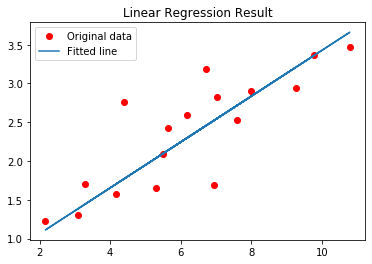

In [13]:
plt.plot(train_X, train_Y, 'ro', label ='Original data') 
plt.plot(train_X, predictions, label ='Fitted line') 
plt.title('Linear Regression Result') 
plt.legend() 
plt.show() 

#### Lưu mô hình

Do mô hình của chúng là một đường thẳng được xác định bởi các hệ số $b_0, b$ nên ta cũng không cần phải làm các thao tác đặc biệt về mặc lưu mô hình mà chỉ cần lưu trữ hai hệ số này là được. 

In [35]:
mymodel = np.array([weight, bias])
print(mymodel)

[0.2955801  0.47064278]


#### Kiểm thử 

In [43]:
# Testing example, as requested (Issue #2)
test_X = np.array([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_Y = np.array([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

test_predictions = weight * test_X + bias

lost = 0
for i in range(0, len(test_X)):
    lost = lost + (test_predictions[i] - test_Y[i])**2

lost = np.sqrt(lost)
print("The mean arverage lost is ", lost)

The mean arverage lost is  1.1132872893381014
